In [1]:
import sys  
sys.path.insert(1, "..")
from hfsp_scripts import hfsp_functions as hfsp
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import networkx as nx
import pandas as pd
import collections
import itertools
import seaborn as sns

In [2]:
T_2d = hfsp.create_tissue("../inputs/2d_sam.csv", True)
T_3d = hfsp.create_tissue("../inputs/3d_sam.csv", True)

temp_sch_4wC = np.array([672])
temp_sch_4wCW = np.array([20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,
                          20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,20,4,12])

p_decay0 = 0
p_decay = 0.00003
p_cold = 0.0003
p_warm = 0.03
p_edge = 1

In [3]:
df_MR0_50_2d = hfsp.ensemble(T_2d, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 20 , jump_state = 'default')

In [4]:
df_MR0_50_3d = hfsp.ensemble(T_3d, temp_sch_4wC, p_decay, p_cold, p_warm, p_edge, 
                          rule_code_node = [0,0.5], rule_code_edge = None, ensemble_size = 20 , jump_state = 'default')

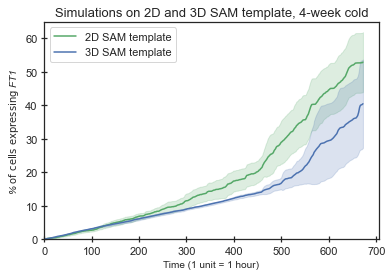

In [5]:

sns.set()
sns.set_style("white")
fig, ax = plt.subplots()
ax.set_ylabel(r"% $\rm{of\ cells\ expressing}$ FT1", font = "Arial", style = 'italic')
ax.set_xlabel(r"Time (1 unit = 1 hour)", font = "Arial")
ax.set_title(r"Simulations on 2D and 3D SAM template, 4-week cold", font = "Arial", fontsize = 13)

ax.plot(df_MR0_50_2d['time'], df_MR0_50_2d['mean'], 'g', label='2D SAM template')
ax.fill_between(df_MR0_50_2d['time'], df_MR0_50_2d['lower'], df_MR0_50_2d['upper'], color='g', alpha=0.2)

ax.plot(df_MR0_50_3d['time'], df_MR0_50_3d['mean'], 'b', label='3D SAM template')
ax.fill_between(df_MR0_50_3d['time'], df_MR0_50_3d['lower'], df_MR0_50_3d['upper'], color='b', alpha=0.2)

ax.tick_params(bottom = True, left = True, direction="inout")
ax.set_xlim(0,)
ax.set_ylim(0,)
ax.legend(loc = "upper left")
plt.show()
fig.savefig("hfsp_with_2D_and_3D.png", dpi = 600)